<center>
    <img src="https://cdn.ticbeat.com/src/uploads/2020/08/machine-learning-mooc-810x540.jpg" width="500" />
</center>

# Analisis en regresión no lineal

Tiempo estimado: **2** horas

## Objetivos

Al finalizar podrás:

-   Diferenciar entre un modelo lineal y no lineal
-   Conocer distintos modelos no lineales
-   Cuando usar un modelo no lineal


Si los datos muestran una tendencia con curvas, entonces la regresión lineal no producirá resultados muy precisos en comparación con una regresión no lineal porque, como su nombre lo indica, la regresión lineal supone que los datos son lineales.
Aprendamos sobre regresiones no lineales y apliquemos un ejemplo en Python. En las siguientes lineas ajustaremos un modelo no lineal a los puntos de datos correspondientes al PIB de China de 1960 a 2014.


<h2 id="importing_libraries">Librerías a usar</h2>


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Aunque la regresión lineal es muy buena para resolver muchos problemas, no se puede utilizar para todos los conjuntos de datos. Primero, recordemos cómo la regresión lineal podría modelar un conjunto de datos. Modela una relación lineal entre una variable dependiente y y una variable independiente x. Tenía una ecuación simple, de grado 1, por ejemplo y = $ 2x $ + 3.


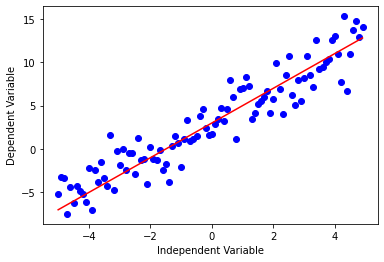

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

##Puedes variar los parámetros pendiente y ordenada al origen
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Las regresiones no lineales son una relación entre variables independientes $ x $ y una variable dependiente $ y $ que dan como resultado datos modelados de función no lineal. Esencialmente, cualquier relación que no sea lineal puede denominarse no lineal y generalmente se representa mediante el polinomio de $ k $ grados (potencia máxima de $ x $).


$$ \ y = a x^3 + b x^2 + c x + d \ $$

Las funciones no lineales pueden tener elementos como funciones exponencial, logaritmo, tipo potencia (distinto de 1), seno, coseno y otros. Por ejemplo:

O incluso, combinaciones de todas estas, por ejemplo:
$$ y = \log(-6x^3 + 5 x^2)-6sin(x^2+e^{-\frac{4}{x}})$$


### Cuadrático

El siguiente ejemplo es una función cuadrática (tipo $y=a x^2 + b x + c$).

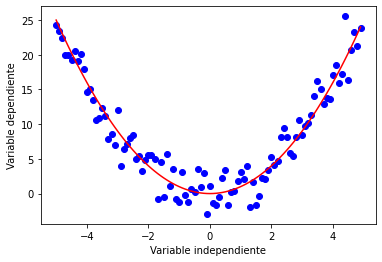

In [12]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Variable dependiente')
plt.xlabel('Variable independiente')
plt.show()

### Cúbico

El siguiente ejemplo es una función cúbica (tipo $y=a x^3 + b x^2 + c x + d$).

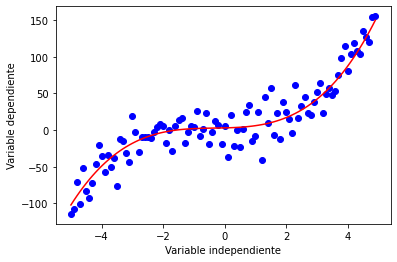

In [14]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Variable dependiente')
plt.xlabel('Variable independiente')
plt.show()

### Exponencial


Una función exponencial con base (c) se ve de la siguiente manera $$ y=a + b c^x$$ donde b ≠0, c > 0 , c ≠1, $x\in R$. Una base muy común para este tipo de función, es el número de Euler:
$$e=\lim_{n\to \infty}(1+\frac{1}{n})^{n} \simeq 2.7182\dots$$

Con lo que la función exponencial se ve $$ y=a + b e^x$$

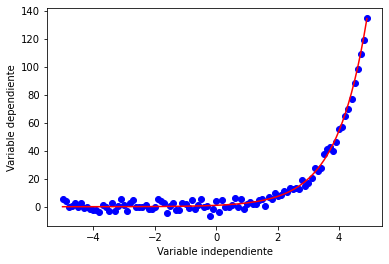

In [23]:
X = np.arange(-5.0, 5.0, 0.1)

Y= np.exp(X)
y_noise = 3*np.random.normal(size=X.size)
ydata = Y + y_noise
plt.plot(X, ydata, 'bo')
plt.plot(X,Y, c='r') 
plt.ylabel('Variable dependiente')
plt.xlabel('Variable independiente')
plt.show()

### Logarítmico

Una función logarítmica con base (c) se ve de la siguiente manera $$ y=a + b\cdot log_c(x)$$ donde b ≠0, c > 0 , c ≠1, $x\in R$. Una base muy común para este tipo de función, es el número de Euler, donde el logaritmo recibe el nombre de logaritmo natural: $log_e(x)=ln(x)$


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


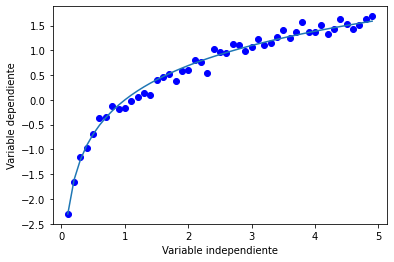

In [24]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)
y_noise =  1/10*np.random.normal(size=X.size)
ydata = Y + y_noise
plt.plot(X, ydata, 'bo')
plt.plot(X,Y) 
plt.ylabel('Variable dependiente')
plt.xlabel('Variable independiente')
plt.show()

### Seno/coseno

Una función sinusoidal se ve de la siguiente manera $$y= a + b\cdot \sin(x)$$

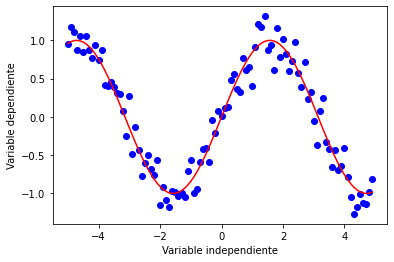

In [25]:
X = np.arange(-5.0, 5.0, 0.1)

Y= np.sin(X)
y_noise = 0.2*np.random.normal(size=X.size)
ydata = Y + y_noise
plt.plot(X, ydata, 'bo')
plt.plot(X,Y, c='r') 
plt.ylabel('Variable dependiente')
plt.xlabel('Variable independiente')
plt.show()

### Sigmoidal/Logistica


$$ y = a + \frac{b}{1+ c^{(X-d)}}$$


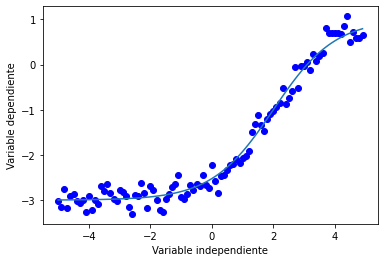

In [29]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.exp(X-2))
y_noise =  1/5*np.random.normal(size=X.size)
ydata = Y + y_noise
plt.plot(X, ydata, 'bo')
plt.plot(X,Y) 
plt.ylabel('Variable dependiente')
plt.xlabel('Variable independiente')
plt.show()

# Ejemplo de modelo no lineal

Vamos a ajustar un modelo no lineal a los puntos de datos correspondientes al PIB de China de 1960 a 2014 (en dólares de EUA).

In [30]:
import numpy as np
import pandas as pd

!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

2021-05-27 22:39:38 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


### Graficando los datos

La gráfica nos ayuda a visualizar la linealidad o no linealidad de un conjunto de datos.

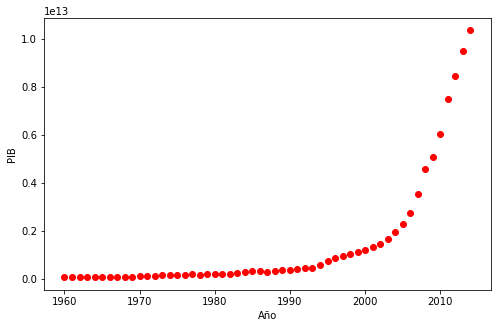

In [32]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('PIB')
plt.xlabel('Año')
plt.show()

### Elegir un modelo

A partir de una mirada inicial a la gráfica, determinamos que la función logística podría ser una buena aproximación,
ya que tiene la propiedad de comenzar con un crecimiento lento, aumentando el crecimiento en el medio y luego disminuyendo nuevamente al final; como se ilustra a continuación:


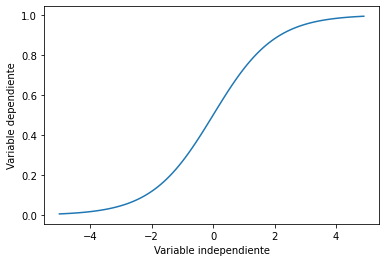

In [33]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Variable dependiente')
plt.xlabel('Variable independiente')
plt.show()

La siguiente expresión muestra la forma analítica de la función logística (o sigmoide):

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controla la pendiente de la curva,

$ \beta_2 $: Desliza la curva en el eje x.



In [39]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

Veamos como se ajusta la función sigmoide con los datos reales.

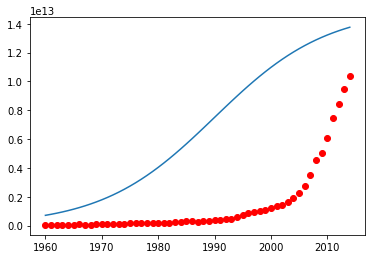

In [54]:
beta_1 = 0.10
beta_2 = 1990.0

Y_pred = sigmoid(x_data, beta_1 , beta_2)

plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

Como se puede ver, el ajuste es muy pobre con los parámetros que le estamos dando a la función sigmoide.

Debemos encontrar los mejores valores de $\beta_1$ y de $\beta_2$ para que se ajuste.

In [88]:
# Normalicemos nuestros datos
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

#### How we find the best parameters for our fit line?

Para encontrar los mejores parámetros usaremos **curve_fit** que usa mínimos cuadrados no lineal para ajustar a nuestra función sigmoide. Los valores óptimos se obtienen minimizando la suma de los valores de la función sigma menos los valores reales de nuestros datos sigmoid(xdata) - ydata.

In [56]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451715, beta_2 = 0.997207


Ahora graficamos con los parámetros optimizados.

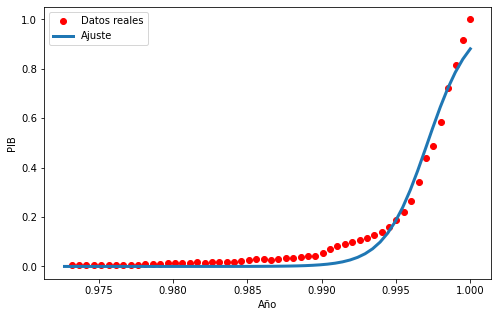

In [85]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='Datos reales')
plt.plot(x,y, linewidth=3.0, label='Ajuste')
plt.legend(loc='best')
plt.ylabel('PIB')
plt.xlabel('Año')
plt.show()

Con estos parámetros el ajuste es muy bueno. ¿Qué tan bueno? A continuación lo determinaremos.

## Precisión del modelo

In [87]:
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.01
Residual sum of squares (MSE): 0.00
R2-score: 0.99


### Actividad

Con los mismos datos del PIB de China, realiza un modelo con un ajuste de tipo lineal.